In [1]:
import numpy as np
import pandas as pd
import pyro.distributions as dist
from scipy import stats

from scipy.stats import binom, beta, pareto

import torch
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
phi = 0.1
k = 500
a = phi * k
b = (1-phi) * k
print(a,b)

50.0 450.0


In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Function to compute the skewness of the Beta distribution
def beta_skewness(a, b):
    skewness = 2 * (b - a) * np.sqrt(a + b + 1) / ((a + b + 2) * np.sqrt(a * b))
    return skewness

alpha_range = np.linspace(0.1, 500, 500)
beta_range = np.linspace(0.1, 500, 500)
results = []

for a in alpha_range:
    for b in beta_range:
        skewness = beta_skewness(a, b)
        phi = a/(a+b)
        kappa = a + b
        results.append({"a": a, "b": b, "phi": phi, "kappa": kappa, "skewness": skewness})

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(results)

# Sort by skewness, since we want symmetric distributions (skewness close to 0)
df['abs_skewness'] = df['skewness'].abs()
df_sorted = df.sort_values(by='abs_skewness')

c:\Users\Standard\miniconda3\envs\deeplearning\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


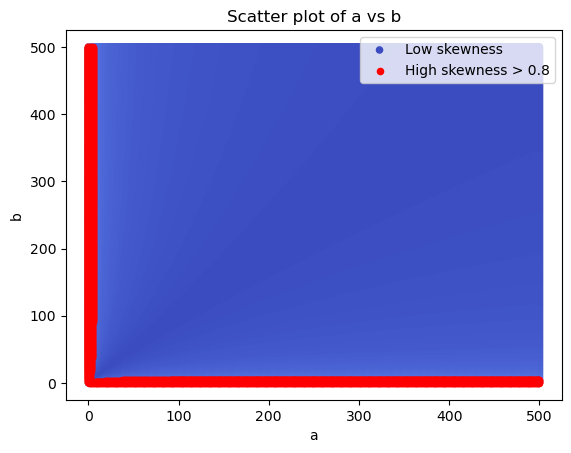

In [13]:
thres = 0.8
highlight = df['abs_skewness'] > thres  # Condition to highlight high skewness

plt.scatter(df['a'], df['b'], c=df['abs_skewness'], cmap='coolwarm', s=20, label='Low skewness')
plt.scatter(df[highlight]['a'], df[highlight]['b'], color='red', s=20, label=f'High skewness > {thres}')

plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a vs b')
plt.legend()

plt.show()

In [47]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

def beta_skewness(a, b):
    skewness = 2 * (b - a) * np.sqrt(a + b + 1) / ((a + b + 2) * np.sqrt(a * b))
    return skewness

phi_range = np.linspace(0.01, 0.99, 200)
kappa_range = np.linspace(0.01, 500, 200)
results = []

for phi in phi_range:
    for kappa in kappa_range:
        a = phi * kappa
        b = (1-phi) * kappa
        skewness = beta_skewness(a, b)
        results.append({"a": a, "b": b, "phi": phi, "kappa": kappa, "skewness": skewness})

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(results)

# Sort by skewness, since we want symmetric distributions (skewness close to 0)
df['abs_skewness'] = df['skewness'].abs()
df_sorted = df.sort_values(by='abs_skewness')

# plt.figure(figsize=(10, 6))
# plt.scatter(df['a'], df['b'], c=df['abs_skewness'], cmap='coolwarm', s=50)
# plt.colorbar(label='Absolute Skewness')
# plt.xlabel('a')
# plt.ylabel('b')
# plt.title('Skewness of Beta')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.scatter(df['phi'], df['kappa'], c=df['abs_skewness'], cmap='coolwarm', s=50)
# plt.colorbar(label='Absolute Skewness')
# plt.xlabel('phi')
# plt.ylabel('kappa')
# plt.title('Skewness of Beta')
# plt.show()

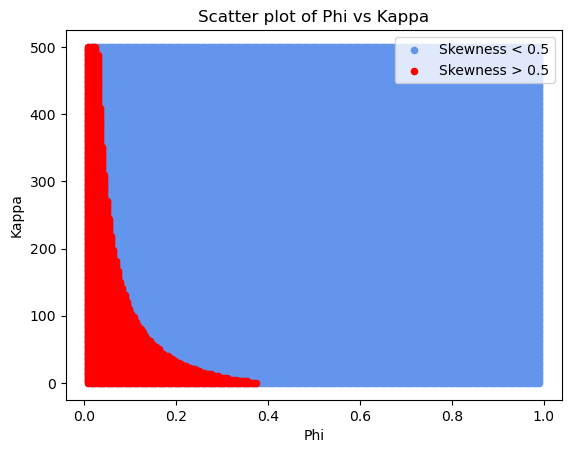

In [67]:
hres = 0.5
highlight = df['skewness'] > thres  # Condition to highlight high skewness

# Scatter plot with highlighted points for high skewness
# plt.scatter(df['phi'], df['kappa'], c=df['abs_skewness'], cmap='coolwarm', s=20, label='Low skewness')
plt.scatter(df['phi'], df['kappa'], color='cornflowerblue', s=20, label=f'Skewness < {thres}')
plt.scatter(df[highlight]['phi'], df[highlight]['kappa'], color='red', s=20, label=f'Skewness > {thres}')

# Adding labels and title
plt.xlabel('Phi')
plt.ylabel('Kappa')
plt.title('Scatter plot of Phi vs Kappa')
plt.legend()

# Show plot
plt.show()

In [81]:
n_samples = 50
thres = 0.4
highlight = (df['skewness'] > thres) & (df['phi'] > 0.15) & (df['kappa'] > 90)

num_high_skew = highlight.sum()

if num_high_skew < n_samples:
    print(f"Only {num_high_skew} rows meet the condition. Extracting all available.")
    sampled_df = df[highlight]
else:
    sampled_df = df[highlight].sample(n=n_samples, random_state=42)  # random_state for reproducibility


Only 0 rows meet the condition. Extracting all available.


In [79]:
n_samples = 50
thres = 0.5
highlight = (df['skewness'] > thres) & (df['skewness'] < 0.6)

num_high_skew = highlight.sum()

if num_high_skew < n_samples:
    print(f"Only {num_high_skew} rows meet the condition. Extracting all available.")
    sampled_df = df[highlight]
else:
    sampled_df = df[highlight].sample(n=n_samples, random_state=42)  # random_state for reproducibility


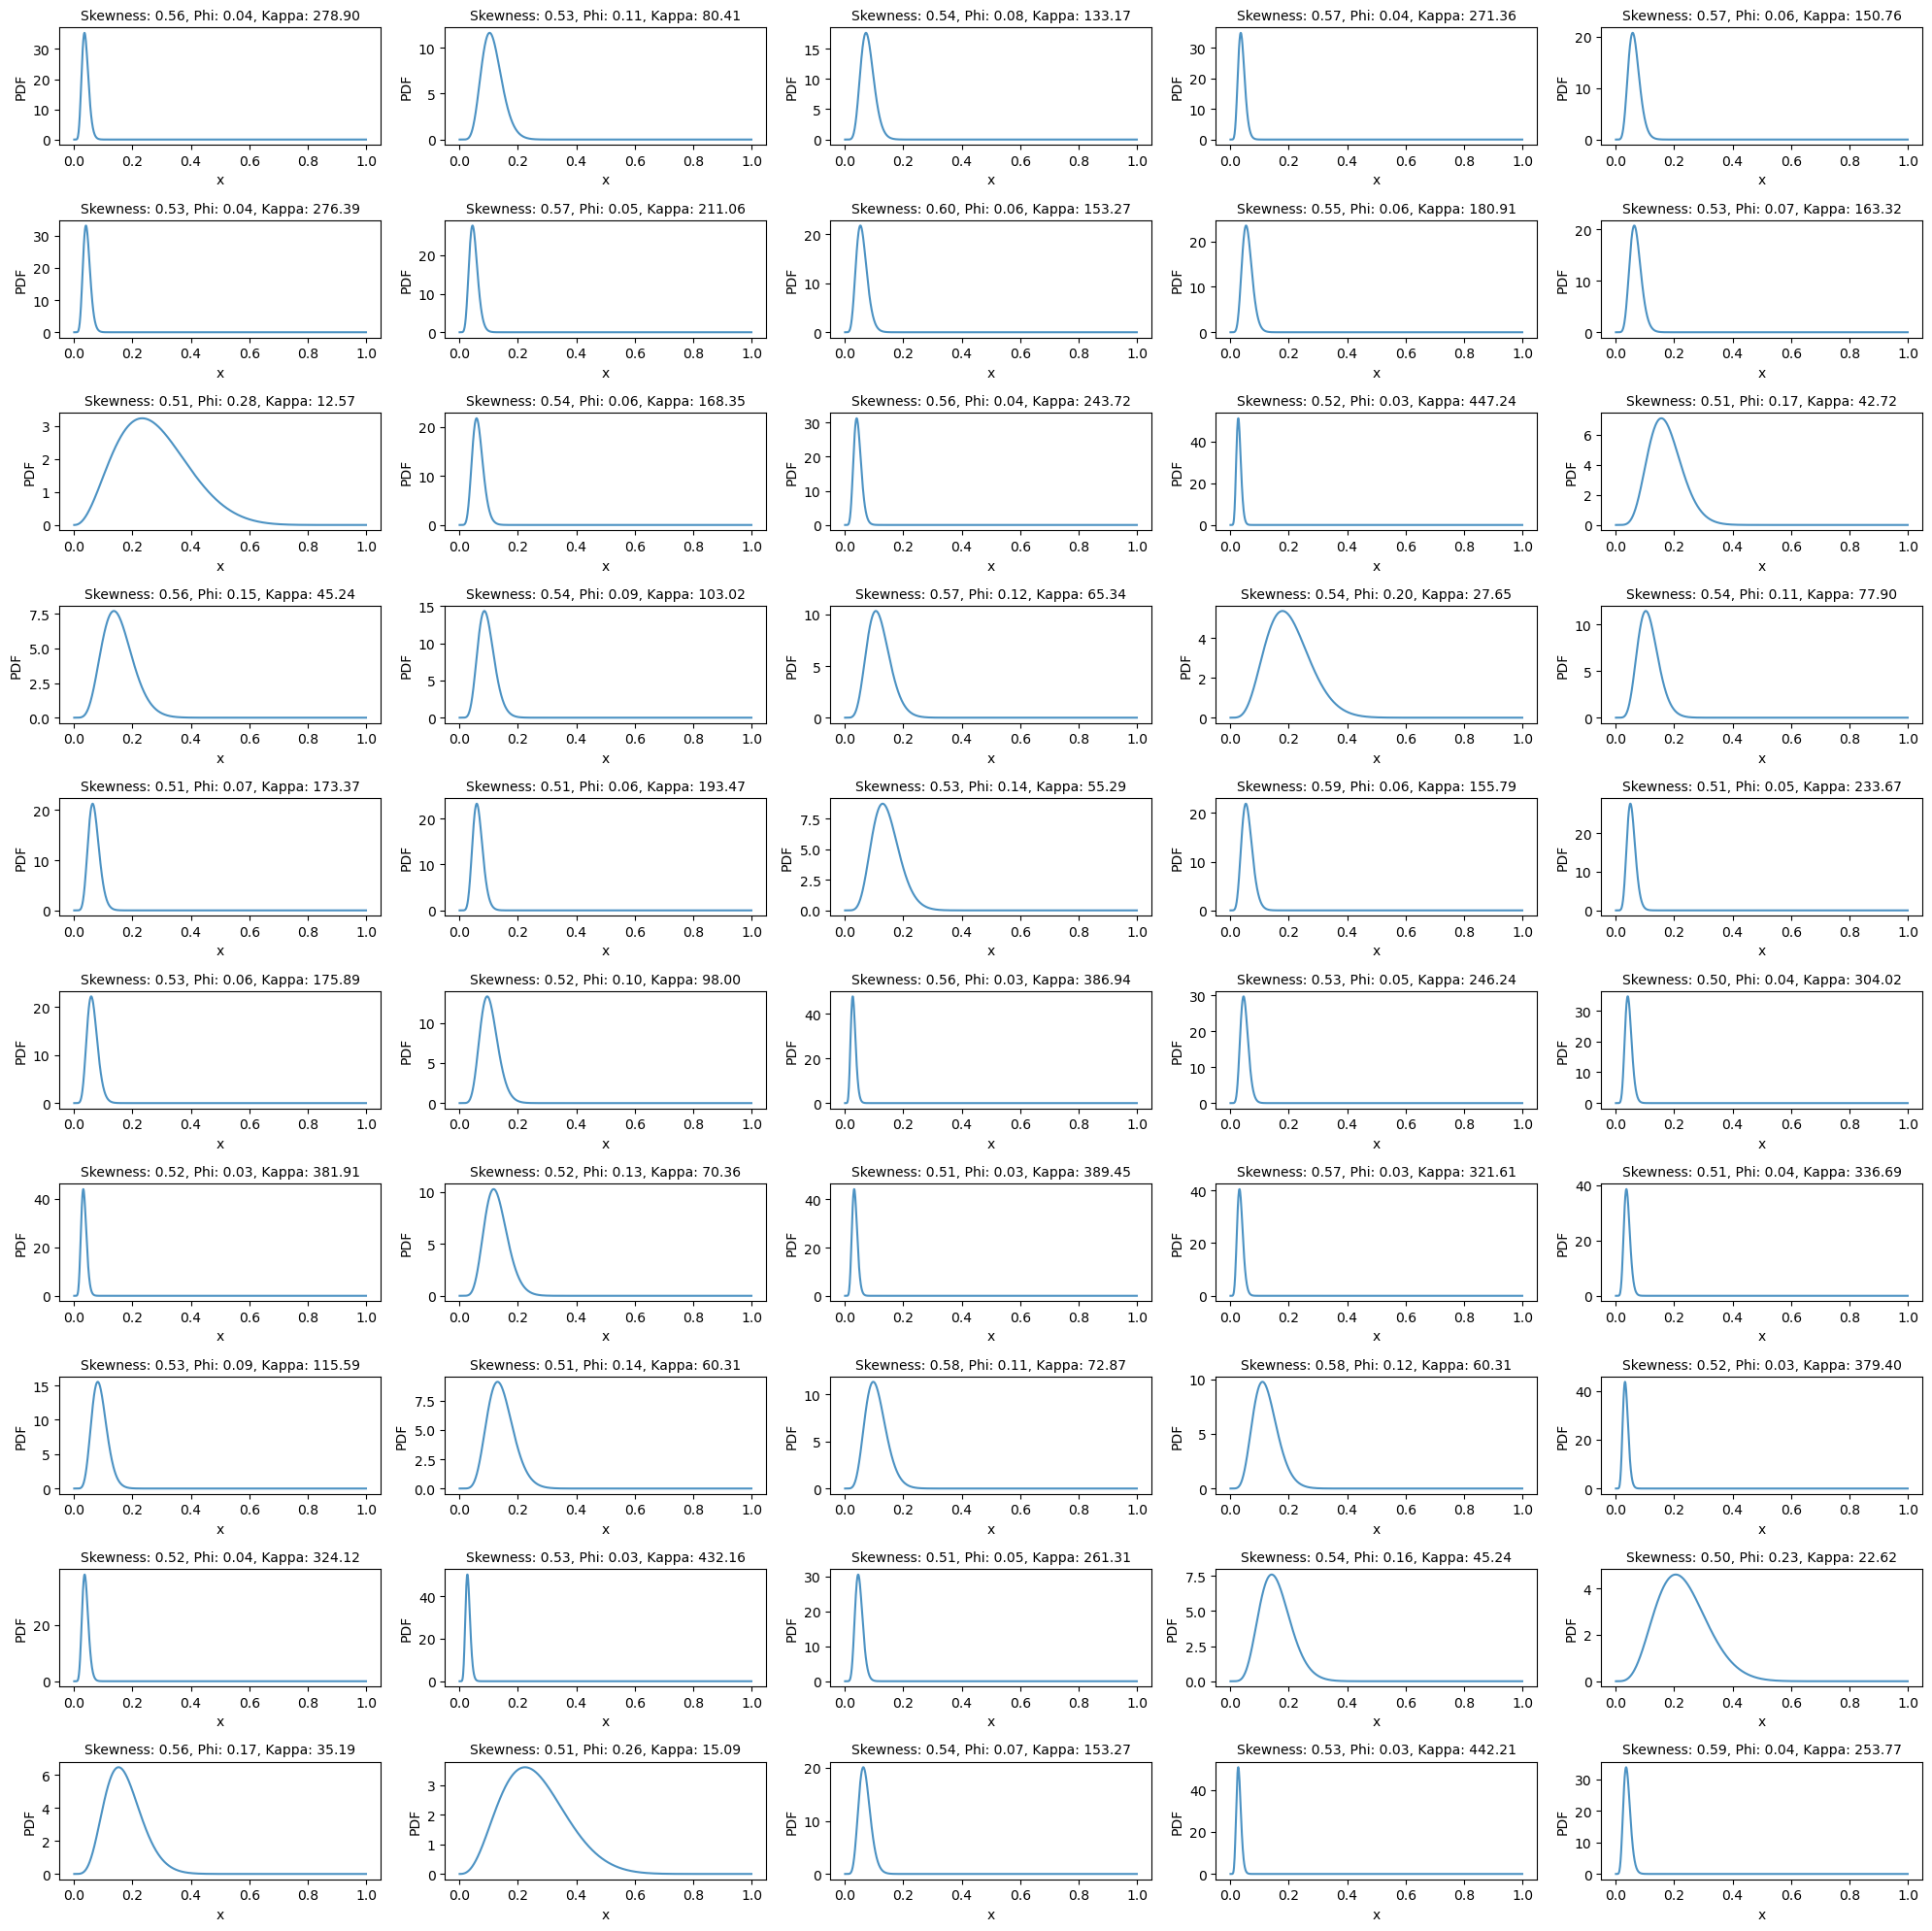

In [80]:
fig, axes = plt.subplots(10, 5, figsize=(20, 20))  # Adjusted for a 10x5 grid

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Loop through each sampled row and corresponding subplot axis
for ax, (index, row) in zip(axes, sampled_df.iterrows()):
    phi = row['phi']
    kappa = row['kappa']
    skewness = row['skewness']
    
    # Calculate Beta distribution parameters
    a_beta = phi * kappa
    b_beta = (1 - phi) * kappa
    
    x = np.linspace(0.001, 0.999, 1000)
    
    pdf = beta.pdf(x, a_beta, b_beta)
    
    ax.plot(x, pdf, linewidth=1.5, alpha=0.8)
    
    ax.set_title(f'Skewness: {skewness:.2f}, Phi: {phi:.2f}, Kappa: {kappa:.2f}', fontsize=10)

    ax.set_xlabel('x')
    ax.set_ylabel('PDF')

plt.tight_layout()

plt.show()